### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#tienda.head()
tienda2.head()
#tienda3.head()
#tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [3]:
tiendas = ['tienda1', 'tienda2','tienda3','tienda4']

def facturacion(tienda):
  precios = sum(tienda['Precio'])
  costos = sum(tienda['Costo de envío'])
  totalventas = float(precios + costos)

  return totalventas

facturaciones = []
facturacion_tienda = [facturacion(tienda), facturacion(tienda2), facturacion(tienda3), facturacion(tienda4)]
facturacion_total = sum(facturacion_tienda)

porc_facturacion = []
for n in facturacion_tienda:
  porciento = (n / facturacion_total)*100
  porc_facturacion.append(round(porciento, 2))

facturaciones = list(zip(tiendas, facturacion_tienda, porc_facturacion))

mensaje_facturacion = 'La facturación de las tiendas es de la siguiente manera:\n'
print(mensaje_facturacion)

mensaje_facturacion = ' Tienda     Ventas             % Participación'
print(mensaje_facturacion)

mensaje_facturacion = '-----------------------------------------------'
print(mensaje_facturacion)

for i in range(len(facturaciones)):
  mensaje_facturacion = f' {facturaciones[i][0]}    $ {facturaciones[i][1]:,}       {facturaciones[i][2]}%'
  print(mensaje_facturacion)

mensaje_facturacion = '-----------------------------------------------'
print(mensaje_facturacion)

mensaje_facturacion = f' Totales :  $ {facturacion_total:,}'
print(mensaje_facturacion)




La facturación de las tiendas es de la siguiente manera:

 Tienda     Ventas             % Participación
-----------------------------------------------
 tienda1    $ 1,212,258,300.0       26.14%
 tienda2    $ 1,175,828,600.0       25.35%
 tienda3    $ 1,156,536,200.0       24.93%
 tienda4    $ 1,093,693,100.0       23.58%
-----------------------------------------------
 Totales :  $ 4,638,316,200.0


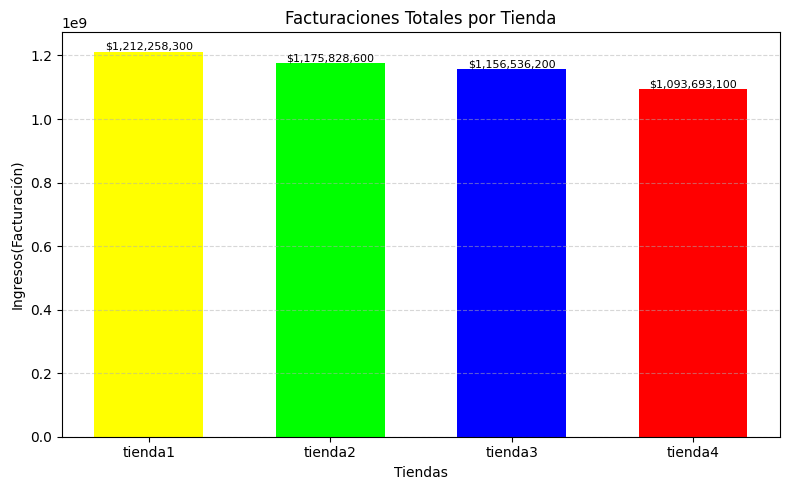

In [4]:
import matplotlib.pyplot as plt

colores = ['#FFFF00', '#00FF00', '#0000FF', '#FF0000']

plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, facturacion_tienda, width=0.6, color=colores)
plt.title('Facturaciones Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos(Facturación)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for barra in barras:
    valory = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, valory, f"${valory:,.0f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

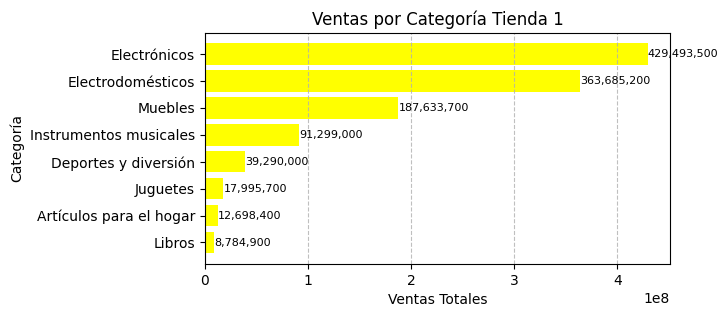

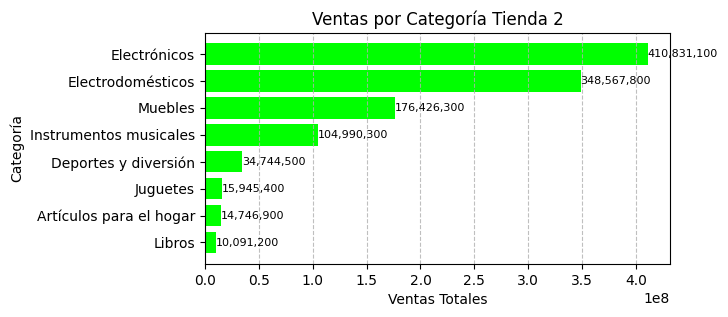

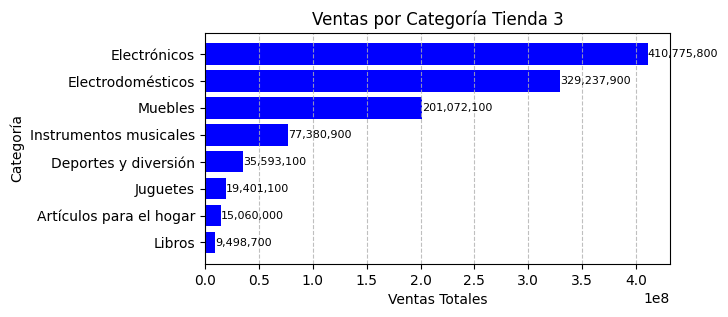

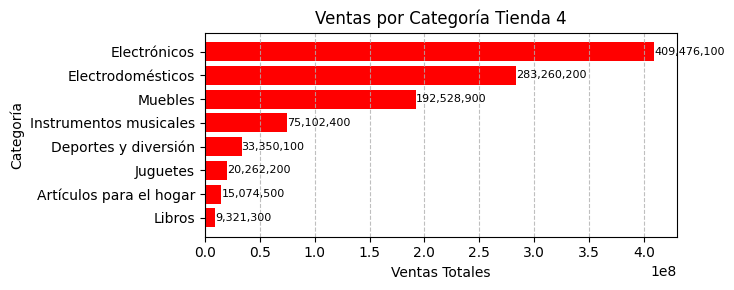

In [5]:
# Gráfico de barras Tienda 1
import matplotlib

# Obtener datos agrupados
df_tienda = tienda.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
df_tienda2 = tienda2.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
df_tienda3 = tienda3.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
df_tienda4 = tienda4.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 3))
barras = plt.barh(df_tienda.index, df_tienda.values, color='#FFFF00')
plt.title('Ventas por Categoría Tienda 1')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.gca().invert_yaxis()  # Ordena las categorias

# Agrega etiquetas Tienda 1
for barra in barras:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height()/2, f"{valorx:,.0f}", va='center', fontsize=8)

# Gráfico de barras Tienda 2
plt.figure(figsize=(6, 3))
barrasTienda2 = plt.barh(df_tienda2.index, df_tienda2.values, color='#00FF00')
plt.title('Ventas por Categoría Tienda 2')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.gca().invert_yaxis()

# Agrega etiquetas Tienda 2
for barra in barrasTienda2:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height()/2, f"{valorx:,.0f}", va='center', fontsize=8)

# Gráfico de barras Tienda 3
plt.figure(figsize=(6, 3))
barrasTienda3 = plt.barh(df_tienda3.index, df_tienda3.values, color='#0000FF')
plt.title('Ventas por Categoría Tienda 3')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.gca().invert_yaxis()

# Agrega etiquetas Tienda 3
for barra in barrasTienda3:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height()/2, f"{valorx:,.0f}", va='center', fontsize=8)

# Gráfico de barras Tienda 4
plt.figure(figsize=(7.4, 3))
barrasTienda4 = plt.barh(df_tienda4.index, df_tienda4.values, color='#FF0000')
plt.title('Ventas por Categoría Tienda 4')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.gca().invert_yaxis()

# Agrega etiquetas Tienda 4
for barra in barrasTienda4:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height()/2, f"{valorx:,.0f}", va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
import numpy as np
promedioTienda = tienda['Calificación'].mean()
promedioTienda2 = tienda2['Calificación'].mean()
promedioTienda3 = tienda3['Calificación'].mean()
promedioTienda4 = tienda4['Calificación'].mean()

print(f'Calificación promedio tienda 1: {promedioTienda:.2f}')
print(f'Calificación promedio tienda 2: {promedioTienda2:.2f}')
print(f'Calificación promedio tienda 3: {promedioTienda3:.2f}')
print(f'Calificación promedio tienda 4: {promedioTienda4:.2f}')


Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


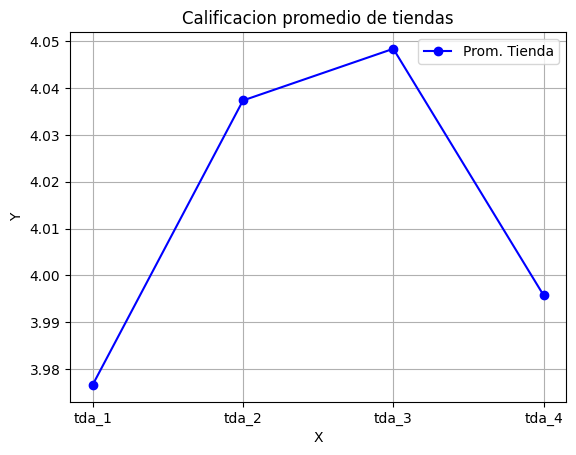

In [7]:
import matplotlib.pyplot as plt

# Datos
x = ['tda_1','tda_2','tda_3','tda_4']
y = [promedioTienda, promedioTienda2, promedioTienda3, promedioTienda4 ]

# Crear gráfico
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Prom. Tienda')

plt.title('Calificacion promedio de tiendas')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()

# 4. Productos más y menos vendidos

In [14]:
import seaborn as sns
def analyze_product_sales(df, tienda_nombre, n_products=5):

    # Cálculos en una sola línea
    sales = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    total = sales.sum()

    # Formateo de resultados
    def format_results(products, label):
        print(f"\n{label}:")
        for product, amount in products.items():
            print(f"• {product:<20} :  $ {amount:>12,.0f}  ({amount/total:.1%})")

    # Resultados
    print(f"\nAnálisis de ventas: {tienda_nombre}\n{'='*40}")
    format_results(sales.head(n_products), f"TOP {n_products} PRODUCTOS")
    format_results(sales.tail(n_products), f"PEORES {n_products} PRODUCTOS")
    print(f"\nTotal general de ventas: ${total:,.2f}\n{'='*40}")

# Procesamiento automático de todas las tiendas
[analyze_product_sales(df, name) for df, name in [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]]


Análisis de ventas: Tienda 1

TOP 5 PRODUCTOS:
• TV LED UHD 4K        :  $  142,150,200  (12.4%)
• Refrigerador         :  $  112,143,300  (9.7%)
• Iphone 15            :  $   97,902,200  (8.5%)
• Smart TV             :  $   67,452,100  (5.9%)
• Lavadora de ropa     :  $   65,783,600  (5.7%)

PEORES 5 PRODUCTOS:
• Ajedrez de madera    :  $    1,430,600  (0.1%)
• Set de vasos         :  $    1,359,100  (0.1%)
• Cubo mágico 8x8      :  $      696,900  (0.1%)
• Dinosaurio Rex       :  $      688,900  (0.1%)
• Cuerda para saltar   :  $      652,800  (0.1%)

Total general de ventas: $1,150,880,400.00

Análisis de ventas: Tienda 2

TOP 5 PRODUCTOS:
• Iphone 15            :  $  113,225,800  (10.1%)
• TV LED UHD 4K        :  $  103,375,000  (9.3%)
• Refrigerador         :  $   97,632,500  (8.7%)
• Lavadora de ropa     :  $   66,762,300  (6.0%)
• Smart TV             :  $   61,142,000  (5.5%)

PEORES 5 PRODUCTOS:
• Set de vasos         :  $    1,542,600  (0.1%)
• Ajedrez de madera    :  $    1

[None, None, None, None]

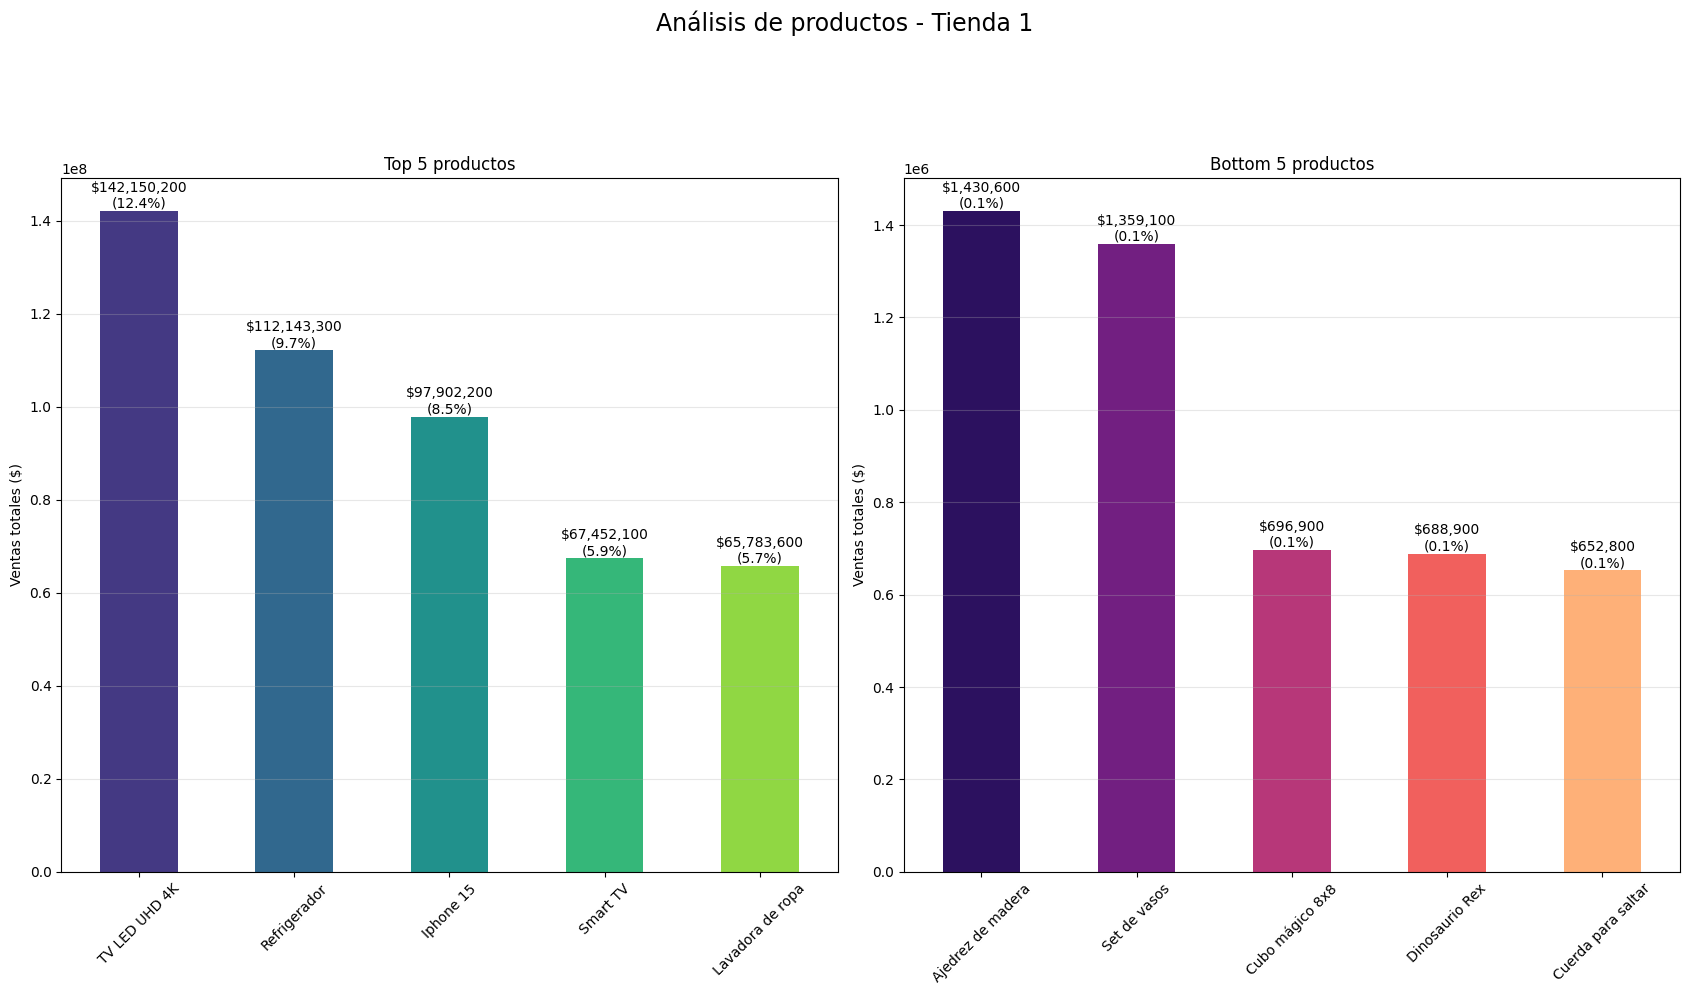

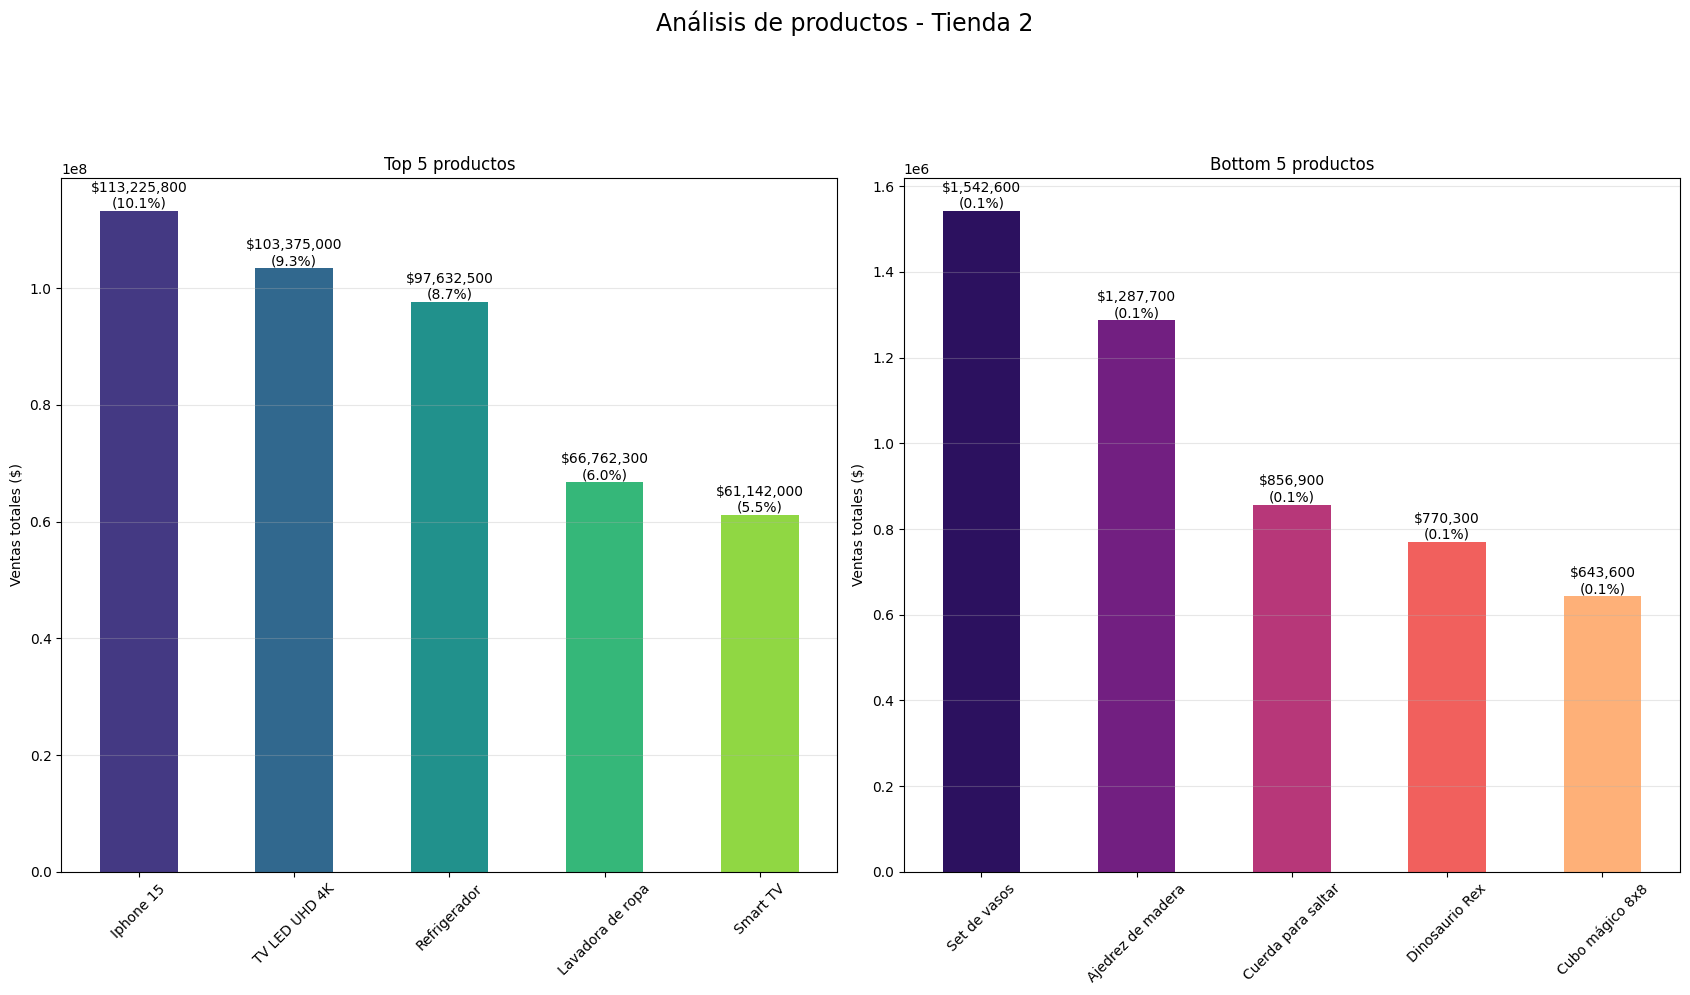

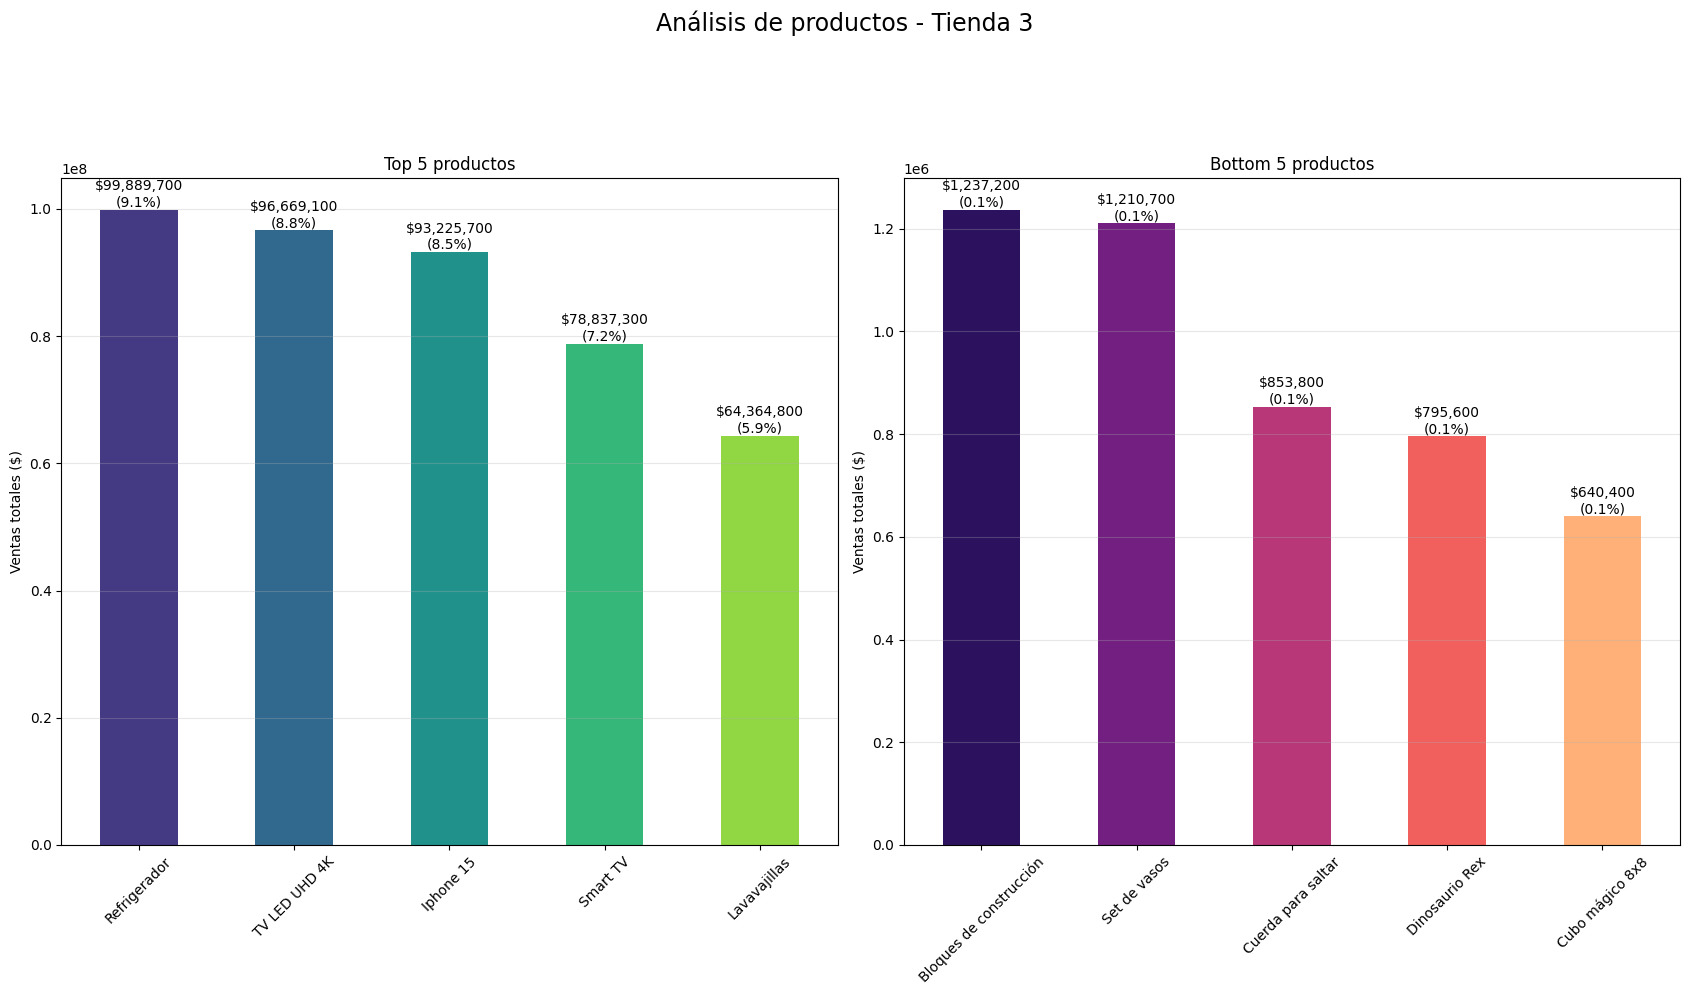

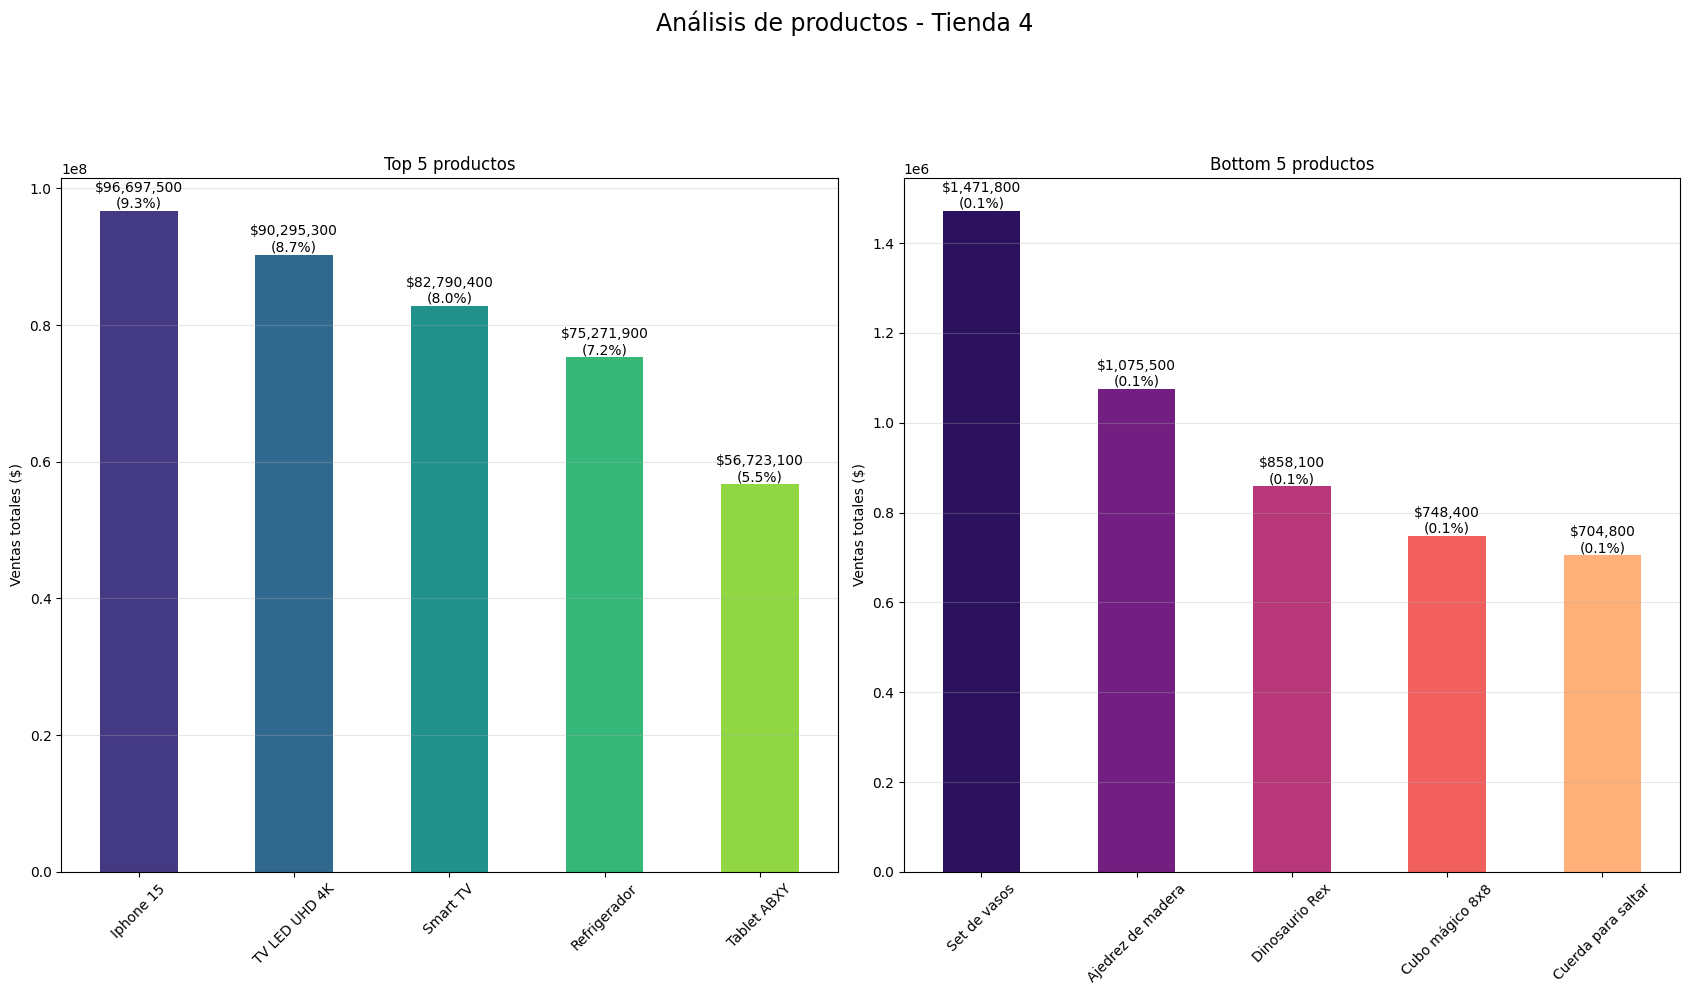

[None, None, None, None]

In [15]:
def plot_top_bottom_products(df, tienda_nombre, n_products=5):

    # Cálculos simplificados
    product_sales = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    total_sales = product_sales.sum()

    # Selección de productos
    top = product_sales.head(n_products)
    bottom = product_sales.tail(n_products)

    # Configuración del gráfico
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
    fig.suptitle(f'Análisis de productos - {tienda_nombre}', y=1.1, fontsize=17)

    # Gráfico de productos más vendidos
    top.plot(kind='bar', ax=ax1, color=sns.color_palette("viridis", n_products))
    ax1.set_title(f'Top {n_products} productos')
    ax1.set_xlabel('')

    # Gráfico de productos menos vendidos
    bottom.plot(kind='bar', ax=ax2, color=sns.color_palette("magma", n_products))
    ax2.set_title(f'Bottom {n_products} productos')
    ax2.set_xlabel('')

    # Añadir porcentajes y formato común
    for ax, data in [(ax1, top), (ax2, bottom)]:
        # Calcular porcentajes
        percentajes = (data / total_sales * 100).round(1)

        # Añadir etiquetas
        for i, (val, pct) in enumerate(zip(data, percentajes)):
            ax.text(i, val, f'${val:,.0f}\n({pct}%)',
                   ha='center', va='bottom',
                   fontsize=10)

        # Configuración común
        ax.set_ylabel('Ventas totales ($)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Uso simplificado con list comprehension
[plot_top_bottom_products(df, name) for df, name in [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]]

# 5. Envío promedio por tienda

In [19]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Lista para almacenar las calificaciones medias
costos = []

for i, t in enumerate(tiendas, start=1):
    costos_media = t["Costo de envío"].mean()
    costos.append(costos_media)  # Guardar cada calificación
    print(f"El costo de envío promedio de la tienda {i} es: {costos_media:,.2f}")


El costo de envío promedio de la tienda 1 es: 26,018.61
El costo de envío promedio de la tienda 2 es: 25,216.24
El costo de envío promedio de la tienda 3 es: 24,805.68
El costo de envío promedio de la tienda 4 es: 23,459.46


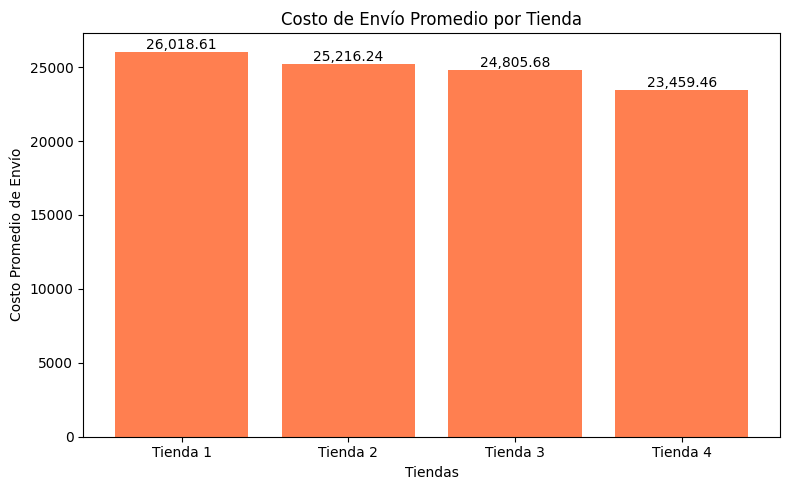

In [20]:
import matplotlib.pyplot as plt

nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]


plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, costos, color='coral')

# Títulos y etiquetas
plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo Promedio de Envío")

# Agregar etiquetas con los valores encima de las barras
for i, valor in enumerate(costos):
    plt.text(i, valor + 0.5, f"{valor:,.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
